In [1]:
# Para que nuestro modelo funcione, se deben importar las siguientes herramientas
# de python:
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

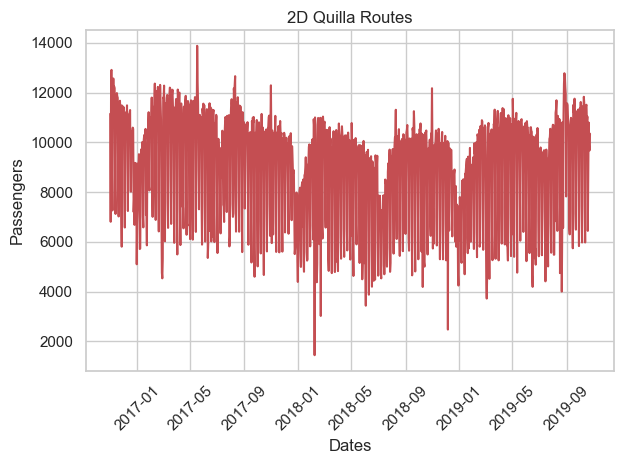

In [2]:
# Para importar los datos requeridos, para entrenar y probar el modelo,
# se debe utilizar la siguiente funcion dada por 'pandas'
url = "./rutas_QUILLA.csv"
load_data = lambda url: pd.read_csv(url)

# Singleton
class DataRoutesQuilla:
  def __init__(self, data, date, quillabamba):
    self.original_data = data
    self.name_date = date
    self.name_quillabamba = quillabamba
    self.data_dates = data[date]
    self.data_quillabamba = data[quillabamba]
    
quilla_routes_data = load_data(url=url)
QUILLA_ROUTES = DataRoutesQuilla(quilla_routes_data, date='FECHA ',quillabamba='QUILLABAMBA')

date_format = '%d/%m/%Y'

# Una vez obtenidos los datos del archivo CSV, podemos representarlos de manera gráfica
# Esto llevaría a obtener la siguiente función:
def draw_classes_2D(data,column_one,column_two):
  data[column_one] = pd.to_datetime(data[column_one], format=date_format)
  sns.set_theme(style="whitegrid")
  plt.plot(data[column_one], data[column_two], 'r')
  plt.title("2D Quilla Routes")
  plt.xlabel('Dates')
  plt.ylabel('Passengers')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

draw_classes_2D(data=QUILLA_ROUTES.original_data, column_one=QUILLA_ROUTES.name_date, column_two=QUILLA_ROUTES.name_quillabamba)

### 1.	De la base de datos otorgada en clases filtrar:
a.	Para TRAIN los años 2016-2018

b.	Para TEST los años 2019

In [3]:
data_q_r = QUILLA_ROUTES.original_data
data_q_r_dates = QUILLA_ROUTES.data_dates
data_q_r_dates = pd.to_datetime(data_q_r_dates, format=date_format)

# a)
train_data = data_q_r[data_q_r_dates.dt.year.isin([2016, 2017, 2018])]
# b)
test_data = data_q_r[data_q_r_dates.dt.year == 2019]

print(train_data)
print(test_data)

        FECHA   QUILLABAMBA
0   2016-11-01        11149
1   2016-11-02         6805
2   2016-11-03        12879
3   2016-11-04        12916
4   2016-11-05         8753
..         ...          ...
783 2018-12-27         7302
784 2018-12-28         7447
785 2018-12-29         4681
786 2018-12-30         4240
787 2018-12-31         6663

[788 rows x 2 columns]
         FECHA   QUILLABAMBA
788  2019-01-01         6040
789  2019-01-02         7799
790  2019-01-03         7555
791  2019-01-04         7705
792  2019-01-05         5245
...         ...          ...
1078 2019-10-19         6439
1079 2019-10-21        10796
1080 2019-10-22         9905
1081 2019-10-23         9676
1082 2019-10-24        10349

[295 rows x 2 columns]


### 2.	Normalizar los datos filtrados entre -1 y 1

In [4]:
def normalize_data(data, column_name, min_data_value=-1, max_data_value=1):
  # Se debe calcular el valor mínimo y máximo de la columna especificada de la siguiente manera:
  min_val = data[column_name].min()
  max_val = data[column_name].max()
  
  # Ahora será posible normalizar los datos entre -1 y 1 como se especificó
  new_data = data
  normalized_column_name = f'normalized_{column_name}'
  new_data[normalized_column_name] = min_data_value + ((data[column_name] - min_val) * (max_data_value - min_data_value) / (max_val - min_val))
  return new_data

column_name = QUILLA_ROUTES.name_quillabamba
normalized_train_data = normalize_data(data=train_data,column_name=column_name)
normalized_test_data = normalize_data(data=test_data,column_name=column_name)

print(normalized_train_data)
print(normalized_test_data)

        FECHA   QUILLABAMBA  normalized_QUILLABAMBA
0   2016-11-01        11149                0.560501
1   2016-11-02         6805               -0.137554
2   2016-11-03        12879                0.838502
3   2016-11-04        12916                0.844448
4   2016-11-05         8753                0.175478
..         ...          ...                     ...
783 2018-12-27         7302               -0.057689
784 2018-12-28         7447               -0.034389
785 2018-12-29         4681               -0.478869
786 2018-12-30         4240               -0.549735
787 2018-12-31         6663               -0.160373

[788 rows x 3 columns]
         FECHA   QUILLABAMBA  normalized_QUILLABAMBA
788  2019-01-01         6040               -0.487202
789  2019-01-02         7799               -0.099073
790  2019-01-03         7555               -0.152913
791  2019-01-04         7705               -0.119815
792  2019-01-05         5245               -0.662621
...         ...          ...      

C:\Users\jsce2\AppData\Local\Temp\ipykernel_30316\1204330327.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[normalized_column_name] = min_data_value + ((data[column_name] - min_val) * (max_data_value - min_data_value) / (max_val - min_val))
C:\Users\jsce2\AppData\Local\Temp\ipykernel_30316\1204330327.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[normalized_column_name] = min_data_value + ((data[column_name] - min_val) * (max_data_value - min_data_value) / (max_val - min_val))


### 3.	Experimentar: Con un Batch=32

Buenos días Team, aquí les dejo mi reporte del daily del día de hoy:
- Que trabajé ayer?
+ Proceder con el squash and merge de los tickets que fueron aprobados por QA, los cuales son los siguientes:
-- jun-42:”Error en el despliegue de la app con datos móviles”
-- jun-38:”Verificar la habilitación de las fechas de inicio”
-- jun-105:"Correcciones de texto y diseño"
-- jun-120:"Corregir validación para el titular de la cuenta y teléfono"
-- jun-36:"Despliegue de popup de turnos en el login"
+ Concluir y publicar el PR del ticket JUN-126:"Add GA events". 
- Que trabajaré hoy?
+ Preparar el ticekt JUN-126:"Add GA events" para que Jass pueda llevar a cabo su respectiva revisión (como se lo especificó en el ticket) en QA.
- Tengo algún bloqueo?
+ ninguno
- Ver estado de tickets en DONE
+ los tickets que fueron agregados a Done son:
-- jun-42:”Error en el despliegue de la app con datos móviles”
-- jun-38:”Verificar la habilitación de las fechas de inicio”
-- jun-105:"Correcciones de texto y diseño"
-- jun-120:"Corregir validación para el titular de la cuenta y teléfono"
-- jun-36:"Despliegue de popup de turnos en el login"